### Loading Libraries and Dependencies

In [30]:
options(warn=-1)
options(repr.plot.width=6, repr.plot.height=4)

### Normality and Poisonness Test

In [31]:
student_mat <- read.csv('data/student-mat.csv')

group1 <- data.frame(student_mat$G1, rep('G1', nrow(student_mat)))
colnames(group1) <- c("grades", "types")
group2 <- data.frame(student_mat$G2, rep('G2', nrow(student_mat)))
colnames(group2) <- c("grades", "types")
group3 <- data.frame(student_mat$G3, rep('G3', nrow(student_mat)))
colnames(group3) <- c("grades", "types")
all_groups <- rbind(group1, group2, group3)

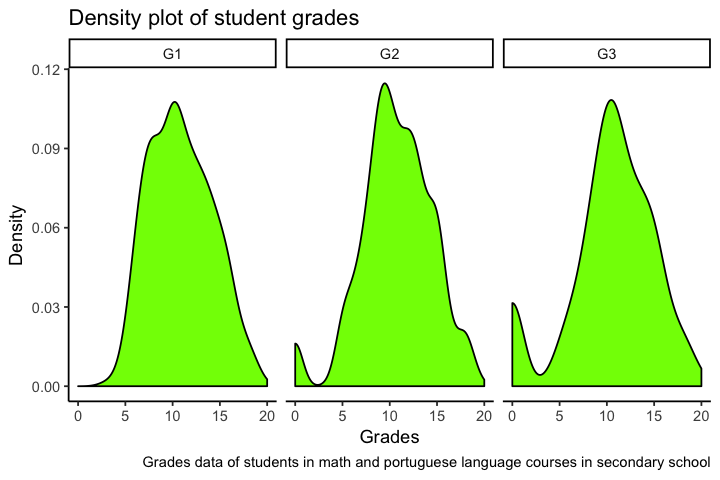

In [32]:
#Normal distributed?
ggplot(data = all_groups, mapping = aes(sample = grades)) + 
  geom_density(aes(x = grades), fill = "chartreuse") +
  facet_wrap(. ~types) + 
  labs(title = "Density plot of student grades",caption = "Grades data of students in math and portuguese language courses in secondary school"
       ,x = "Grades",y = "Density") + theme_classic()

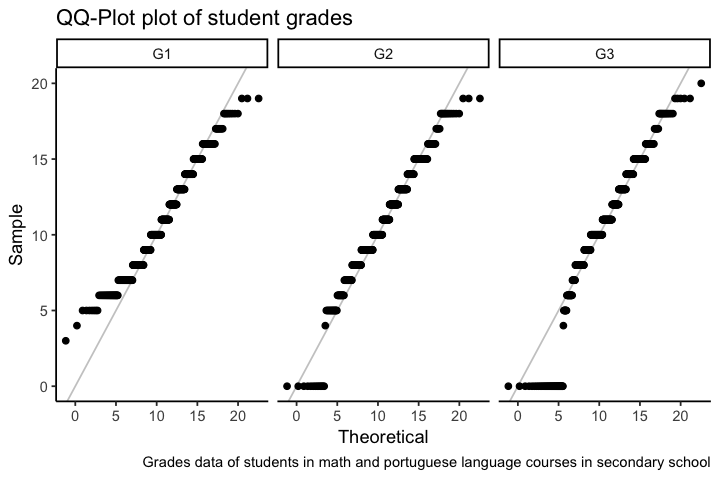

In [33]:
ggplot(data = all_groups, mapping = aes(sample = grades)) + 
  stat_qq(distribution = stats::qnorm, dparams = list(mean = mean(all_groups$grades), sd = sd(all_groups$grades))) +
  geom_abline(alpha = 0.25) +
  facet_wrap(. ~types) + 
  labs(title = "QQ-Plot plot of student grades",caption = "Grades data of students in math and portuguese language courses in secondary school"
       ,x = "Theoretical",y = "Sample") + theme_classic()

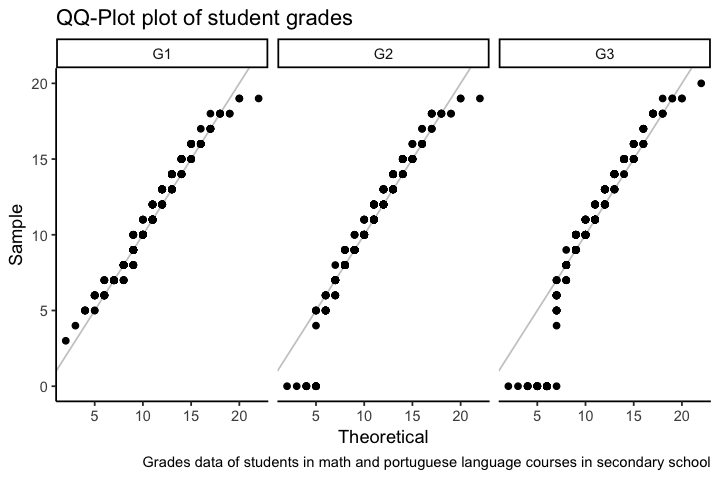

In [34]:
#Poisson distributed?
ggplot(data = all_groups, mapping = aes(sample = grades)) + 
  stat_qq(distribution = stats::qpois, dparams = list(lambda = mean(all_groups$grades))) +
  geom_abline(alpha = 0.25) +
  facet_wrap(. ~types) + labs(title = "QQ-Plot plot of student grades",caption = "Grades data of students in math and portuguese language courses in secondary school"
       ,x = "Theoretical",y = "Sample") + theme_classic()

### Generalized Linear Model

In [35]:
model_1 <- glm(formula = G1 ~. -G2 -G3, family = poisson, data = student_mat) 
summary(model_1)


Call:
glm(formula = G1 ~ . - G2 - G3, family = poisson, data = student_mat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.38057  -0.64611  -0.01502   0.50274   2.01602  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       2.418107   0.331755   7.289 3.13e-13 ***
schoolMS          0.007157   0.058426   0.122  0.90250    
sexM              0.078237   0.036434   2.147  0.03176 *  
age              -0.006480   0.015983  -0.405  0.68515    
addressU          0.012823   0.043630   0.294  0.76882    
famsizeLE3        0.036639   0.035590   1.029  0.30325    
PstatusT          0.016047   0.053050   0.302  0.76227    
Medu              0.010664   0.023797   0.448  0.65405    
Fedu              0.014886   0.020349   0.732  0.46446    
Mjobhealth        0.078652   0.081444   0.966  0.33419    
Mjobother        -0.077025   0.054363  -1.417  0.15653    
Mjobservices      0.043696   0.059492   0.734  0.46266    
Mjobteacher      

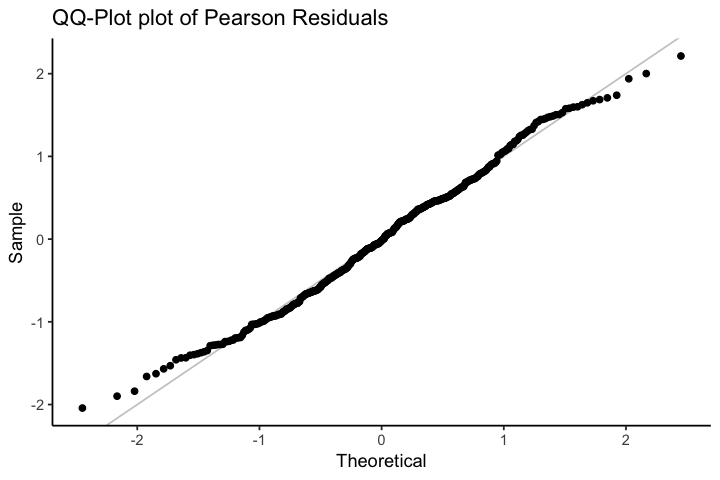

In [36]:
#Pearson residuals for model_1
pearson_residual <- residuals(model_1, "pearson")
pearson_residual <- data.frame(pearson_residual)

## QQ-Plot visualization
ggplot(data = pearson_residual, mapping = aes(sample = pearson_residual)) + 
  stat_qq(distribution = stats::qnorm, dparams = list(mean = mean(pearson_residual$pearson_residual),
                                                      sd = sd(pearson_residual$pearson_residual))) +
  geom_abline(alpha = 0.25) + labs(title = "QQ-Plot plot of Pearson Residuals"
       ,x = "Theoretical",y = "Sample") + theme_classic()

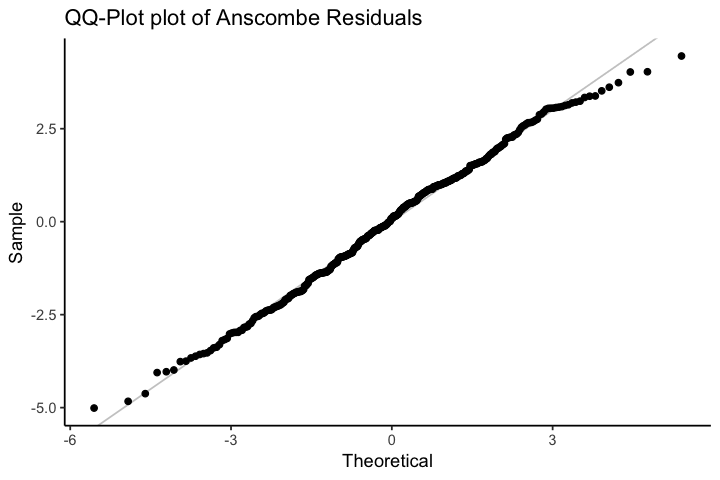

In [37]:
## Function to compute the Anscombe Residuals
anscombe <- function(y, mu){
  (3 *(y ** (2/3)- mu ** (2/3)))/2*(mu ** (1/6))
}


#Anscombe residuals for model_1
anscombe_residual <- anscombe(student_mat$G1, model_1$fitted.values)
anscombe_residual <- data.frame(anscombe_residual)

## QQ-Plot visualization
ggplot(data = anscombe_residual, mapping = aes(sample = anscombe_residual)) + 
  stat_qq(distribution = stats::qnorm, dparams = list(mean = mean(anscombe_residual$anscombe_residual), 
                                                      sd = sd(anscombe_residual$anscombe_residual))) +
  geom_abline(alpha = 0.25) + labs(title = "QQ-Plot plot of Anscombe Residuals"
       ,x = "Theoretical",y = "Sample") + theme_classic()

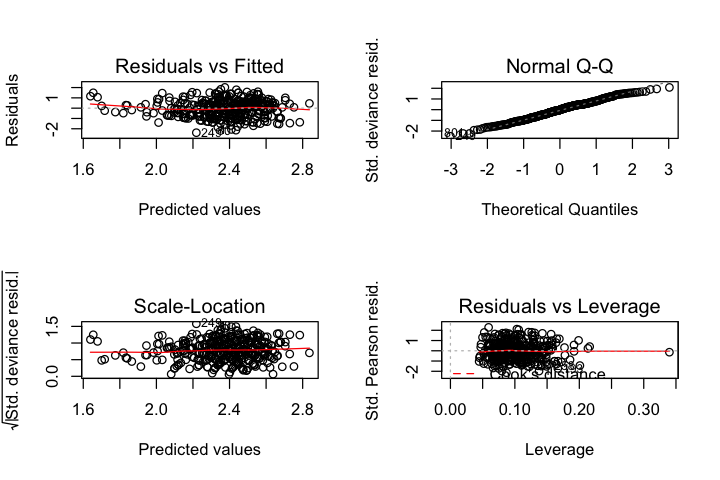

In [38]:
# Residual analysis for model 1
par(mfrow = c(2, 2))
plot(model_1)

In [39]:
model_2 <- glm(formula = G1 ~ sex + Fedu + studytime + failures + schoolsup + famsup + goout , 
               family = poisson, data = student_mat) 
summary(model_2)


Call:
glm(formula = G1 ~ sex + Fedu + studytime + failures + schoolsup + 
    famsup + goout, family = poisson, data = student_mat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.70146  -0.70149  -0.02238   0.58681   2.55092  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.34585    0.07578  30.955  < 2e-16 ***
sexM          0.06585    0.03237   2.034  0.04193 *  
Fedu          0.04281    0.01482   2.888  0.00388 ** 
studytime     0.05828    0.01906   3.057  0.00223 ** 
failures     -0.13876    0.02495  -5.561 2.69e-08 ***
schoolsupyes -0.19834    0.04978  -3.984 6.78e-05 ***
famsupyes    -0.07330    0.03240  -2.263  0.02365 *  
goout        -0.03525    0.01406  -2.506  0.01220 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 402.47  on 394  degrees of freedom
Residual deviance: 302.02  on 387  degrees of freedom
AIC: 1975

In [40]:
#Analysis of deviance
anova(model_2, model_1, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
387,302.0178,NA,NA,NA
355,263.0817,32,38.93604,0.1858459


In [25]:
#model 3 and comparison with model 2
model_3 <- glm(formula = G1 ~ sex + Fedu + studytime + failures + schoolsup + famsup + Walc , family = poisson, data = student_mat) 
summary(model_3)


Call:
glm(formula = G1 ~ sex + Fedu + studytime + failures + schoolsup + 
    famsup + Walc, family = poisson, data = student_mat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.64853  -0.69869  -0.02535   0.61090   2.51693  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   2.31120    0.07204  32.083  < 2e-16 ***
sexM          0.07558    0.03296   2.293  0.02183 *  
Fedu          0.04067    0.01477   2.753  0.00591 ** 
studytime     0.05231    0.01935   2.704  0.00685 ** 
failures     -0.14110    0.02488  -5.671 1.42e-08 ***
schoolsupyes -0.20115    0.04985  -4.035 5.46e-05 ***
famsupyes    -0.07447    0.03239  -2.299  0.02148 *  
Walc         -0.02614    0.01274  -2.052  0.04016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 402.47  on 394  degrees of freedom
Residual deviance: 304.07  on 387  degrees of freedom
AIC: 1977.

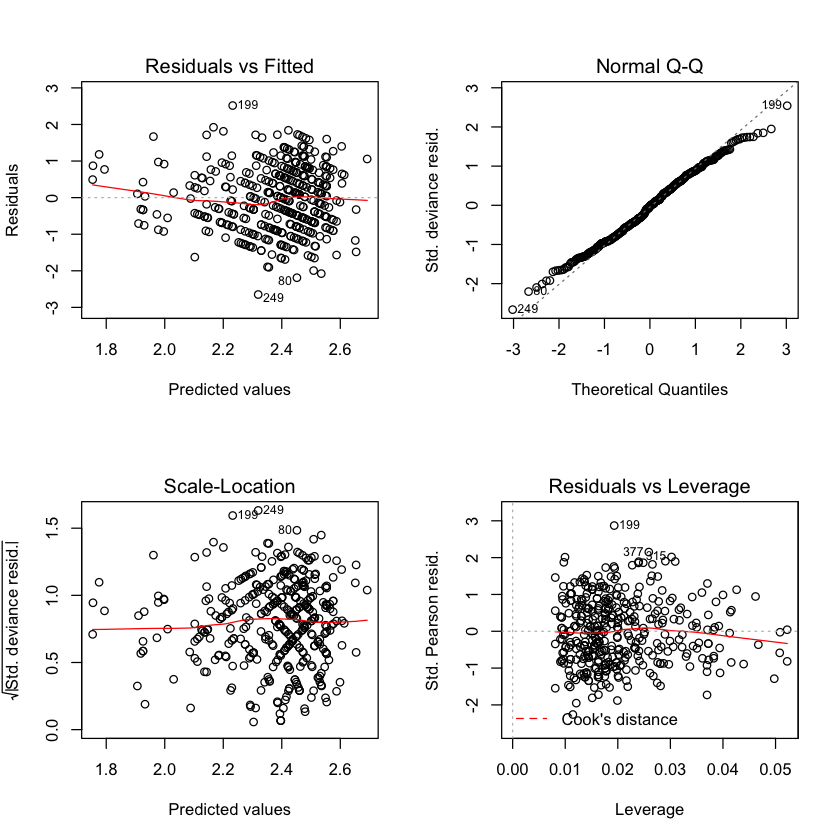

In [26]:
# Residual analysis for model 1
par(mfrow = c(2, 2))
plot(model_3)